In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
#파이토치 디버깅
import pdb

In [2]:
'''
gpu서버중 첫번째 꺼 한대 사용한다. 
cuda 하면 한대던 여러대던 다사용하겠다는 의미
우리는 cuda 이렇게 사용해도 동일한 결과이다. 
'''
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
item = {
      0: 'T-shirt/top'
    , 1: 'Trouser'
    , 2: 'Pullover'
    , 3: 'Dress'
    , 4: 'Coat'
    , 5: 'Sandal'
    , 6: 'Shirt'
    , 7: 'Sneaker'
    , 8: 'Bag'
    , 9: 'Ankle boot'
}

In [14]:
num_epoch = 50
num_classes = 10
batch_size = 100
learnig_rate = 0.001 # 값이 너무 작으면 학습시간이 오래걸리고 너무 크면 발산해 버린다. 


In [15]:
''' 
transforms.ToTensor()
1) 타입을 파이토치에서 쓸 수 있는 tensor()타입으로 변환한다. 
2) /255로 나눠준다... 스케일링
3) 32 x 32 x 3 이미지인데 3 x 32 x32 이렇게 채널을 앞으로 돌린다.  
'''
# 1 단계 로딩 ... 물리적인 위치에 저장함.
train_dataset = torchvision.datasets.FashionMNIST(root = '../../data',
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True)

test_dataset = torchvision.datasets.FashionMNIST(root = '../../data',
                                           train = False,
                                           transform = transforms.ToTensor()
                                           )
                                          
# 2 단계 로딩과정... 모델에 데이터를 쪼개서 로딩하는 과정  이것이 batch_size 이다. 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [16]:
class ConvNet(nn.Module):
  def __init__(self, num_classes):
    super(ConvNet, self).__init__()
    self.layer1 = nn.Sequential( #convelution 과 ReLU를 순차적으로 연결하기 때문에  Sequential로 엮어준다.
        nn.Conv2d(1, 16, kernel_size=5, stride = 1, padding= 2), # convelution 연산과정 #kernel_size는  filter
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        nn.ReLU()
    )
    self.layer2 = nn.MaxPool2d(kernel_size =2, stride=2)
    self.layer3 = nn.Sequential(
        nn.Conv2d(16,32, kernel_size=5, stride=1, padding=2),
        nn.ReLU()
    )
    self.layer4 = nn.MaxPool2d(kernel_size=2, stride =2)
    self.layer5 = nn.Linear(7*7*32, num_classes)

  def forward(self, x):
    #2.
    #pdb.set_trace()
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = out.reshape(out.size(0), -1 ) # 2차원을 1차원으로 펼치는 작업
    out =self. layer5(out)
    return out

In [17]:
model = ConvNet(num_classes).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learnig_rate)

In [18]:
model.train()
total_step = len(train_loader)
for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader):
    # 1. 디버깅을 위한 곳
    #pdb.set_trace()


    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = loss_function(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) %100 ==0:
      print('Eporch[{}/{}], Step[{}/{}], Loss {:.3f}'.format(epoch+1, num_epoch, i+1, total_step, loss.item()))




Eporch[1/50], Step[100/600], Loss 0.580
Eporch[1/50], Step[200/600], Loss 0.553
Eporch[1/50], Step[300/600], Loss 0.494
Eporch[1/50], Step[400/600], Loss 0.535
Eporch[1/50], Step[500/600], Loss 0.336
Eporch[1/50], Step[600/600], Loss 0.340
Eporch[2/50], Step[100/600], Loss 0.344
Eporch[2/50], Step[200/600], Loss 0.408
Eporch[2/50], Step[300/600], Loss 0.403
Eporch[2/50], Step[400/600], Loss 0.169
Eporch[2/50], Step[500/600], Loss 0.338
Eporch[2/50], Step[600/600], Loss 0.486
Eporch[3/50], Step[100/600], Loss 0.318
Eporch[3/50], Step[200/600], Loss 0.269
Eporch[3/50], Step[300/600], Loss 0.234
Eporch[3/50], Step[400/600], Loss 0.314
Eporch[3/50], Step[500/600], Loss 0.294
Eporch[3/50], Step[600/600], Loss 0.350
Eporch[4/50], Step[100/600], Loss 0.461
Eporch[4/50], Step[200/600], Loss 0.160
Eporch[4/50], Step[300/600], Loss 0.295
Eporch[4/50], Step[400/600], Loss 0.277
Eporch[4/50], Step[500/600], Loss 0.233
Eporch[4/50], Step[600/600], Loss 0.348
Eporch[5/50], Step[100/600], Loss 0.271


In [19]:
model.eval()
with torch.no_grad():
  correct = 0
  total =0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print('Test Accuracy of the model on the 10000 test images:{}%'.format(100*correct /total))

  #Save the model chechkpoint
  torch.save(model.state_dict(), 'model.ckpt') 


Test Accuracy of the model on the 10000 test images:90.97%


Label: 1
prediction: 1


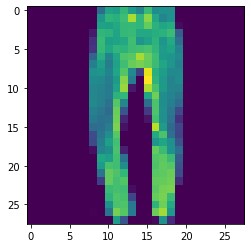

In [20]:
images.size()
images[0].size()
# 첫번째 이미지 h, w만 추출
images[0,0].size()

import numpy as np
import matplotlib.pyplot as plt

idx = 12
image = np.array(images[idx,0].detach().cpu()) # gpu에서 내려줘야한다. 
label = labels[idx].item()
pred = predicted[idx].item()

plt.imshow(image*255) # ToTensor()로 /255 했기 떄문에.. 원래대로 하기위해 곱해준다. 
print("Label:", label)
print("prediction:", pred)

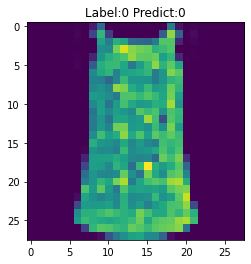

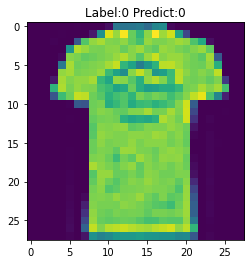

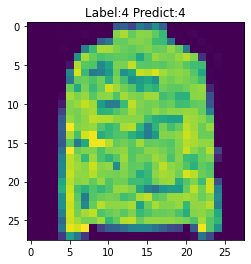

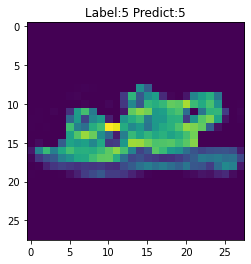

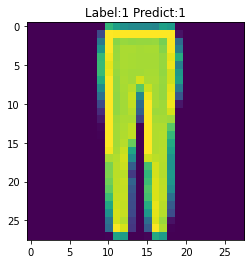

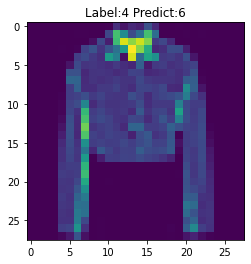

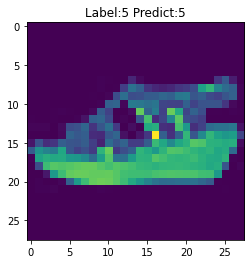

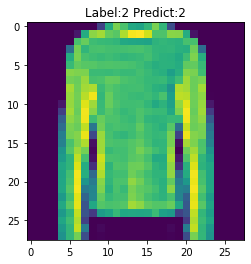

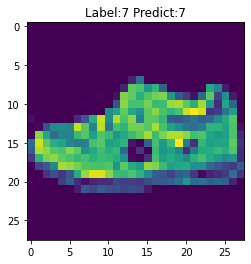

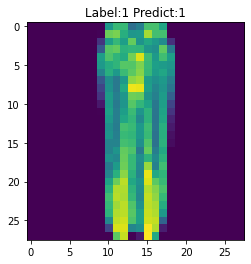

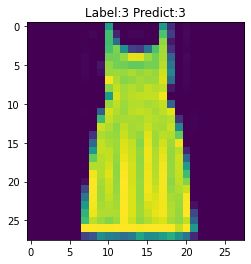

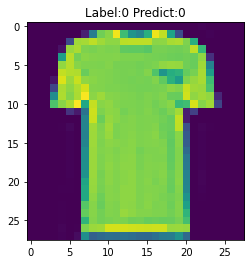

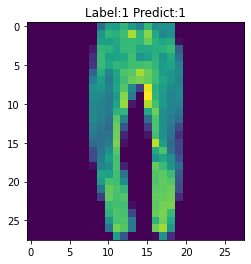

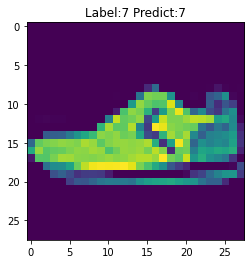

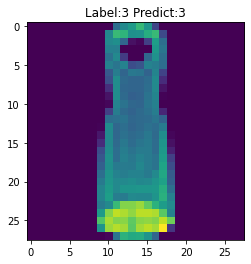

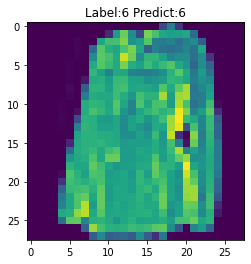

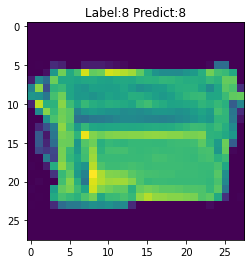

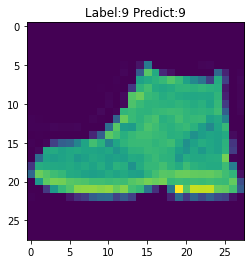

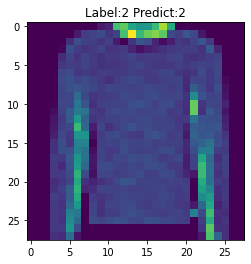

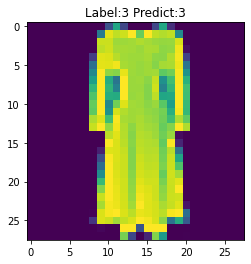

In [21]:
for idx in range(20):
  image = np.array(images[idx,0].detach().cpu())
  label = labels[idx].item()
  pred = predicted[idx].item()

  plt.figure()
  plt.title(f'Label:{label} Predict:{pred}')
  plt.imshow(image*255)

In [12]:
from torchsummary import summary as summary_
summary_(model,(1,28,28),batch_size=10)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [10, 16, 28, 28]             416
              ReLU-2           [10, 16, 28, 28]               0
         MaxPool2d-3           [10, 16, 14, 14]               0
            Conv2d-4           [10, 32, 14, 14]          12,832
              ReLU-5           [10, 32, 14, 14]               0
         MaxPool2d-6             [10, 32, 7, 7]               0
            Linear-7                   [10, 10]          15,690
Total params: 28,938
Trainable params: 28,938
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 3.23
Params size (MB): 0.11
Estimated Total Size (MB): 3.37
----------------------------------------------------------------
